<a href="https://www.kaggle.com/code/sebastinconcha/mortality-rates-countries?scriptVersionId=182917585" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-life-expectancy-at-birth/API_8_DS2_en_excel_v2_580868.xls
/kaggle/input/global-life-expectancy-at-birth/API_8_DS2_en_xml_v2_534914/API_8_DS2_en_xml_v2_534914.xml


In [2]:
#Import de distintas librerias a usar / Import different libraries
!pip install xlrd>=2.0.1

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import warnings

In [3]:
#Seteo de pandas / Panda's settings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
# Cargar dataframe / dataframe variable saving

df_original = pd.read_excel('/kaggle/input/global-life-expectancy-at-birth/API_8_DS2_en_excel_v2_580868.xls', header=None)


In [5]:
#dropeo de las tres primeras filas sin informacion y reinicio de índices / dropping of first three rows and index reset
df_original.drop([0, 1, 2] ,axis=0, inplace=True)
df_original.reset_index(drop=True, inplace=True)

In [6]:
# Asignamos la primera fila como el header y eliminación de la primera fila / first row as header and erase first row
df_original.columns = df_original.iloc[0]
df_original = df_original[1:]

In [7]:
# Para conocer los nombres de las filas que queremos investigar usaremos las siguientes lineas de codigo / To know exactly the name of the 
# rows for later filtering we use the next code:

df_countryclean = df_original.drop(columns=["Country Name", "Country Code", "Indicator Code", 2023], axis=1)
#print(df_clean['Indicator Name'])

# Para este caso particular usaremos algunos indicadores en particular / In this case we will use some indicator for investigation

df_rowsname = df_countryclean.iloc[list(range(7, 69)) + list(range(74, 83)) + list(range(85, 90)) + list(range(228, 231))].reset_index(drop=True)
print(df_rowsname['Indicator Name'])

0                          Population, male (% of total population)
1                                                  Population, male
2                        Population, female (% of total population)
3                                                Population, female
4                                                 Population, total
5                                      Population growth (annual %)
6         Age dependency ratio, young (% of working-age population)
7           Age dependency ratio, old (% of working-age population)
8                Age dependency ratio (% of working-age population)
9                Sex ratio at birth (male births per female births)
10        Population ages 80 and above, male (% of male population)
11    Population ages 80 and above, female (% of female population)
12               Population ages 75-79, male (% of male population)
13           Population ages 75-79, female (% of female population)
14               Population ages 70-74, male (% 

In [8]:
# Clase para plotear usando de argumentos los indices / class for ploting, using the names of the indicators from the above code

class timeplotting():
    def __init__(self, country, actionlist, plotname, plottype):
        self.country = country
        self.df_countryfilter = df_original[df_original["Country Name"] == self.country]
        self.df_countryfilter.reset_index(drop=True, inplace=True)
        self.df_countryfilter = self.df_countryfilter.drop(columns=["Country Name", "Country Code", "Indicator Code", 2023], axis=1)
        self.df_actionfilter = self.df_countryfilter[self.df_countryfilter["Indicator Name"].isin(actionlist)]
        self.melted = self.df_actionfilter.melt(id_vars='Indicator Name', var_name='Year', value_name='Cantidad')

        plt.figure(figsize=(10, 6))
        sns.lineplot(data=self.melted, x='Year', y='Cantidad', hue='Indicator Name', marker='o')

        plt.title(f'{plotname}, 1960/2022 period')
        plt.xlabel('Year')
        if plottype == 'Numeric':
            plt.ylabel('Quantity')
        elif plottype == 'Porcentage':
            plt.ylabel('Porcentage')
        else:
            raise ('Incorrect plot type. Only values "Numeric" or "Porcentage" are accepted')


        plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
        plt.gca().ticklabel_format(style='plain', axis='y')

        plt.grid(True)
        plt.show()




In [9]:

#listas con seleccion de indicadores / list with different indicators

lista_acciones_numericas_1 = ['Population, male',
                            'Population, female',
]

lista_acciones_numericas_2 = ['Mortality rate, adult, male (per 1,000 male adults)',
                            'Mortality rate, adult, female (per 1,000 female adults)',
]

lista_acciones_numericas_3 = ['Mortality rate, infant, male (per 1,000 live births)',
                            'Mortality rate, infant, female (per 1,000 live births)',
]

lista_acciones_numericas_4 = ['Fertility rate, total (births per woman)',
]

lista_acciones_porcentuales_1 = ['Survival to age 65, male (% of cohort)',
                            'Survival to age 65, female (% of cohort)',
]

lista_acciones_porcentuales_2 = ['Population ages 0-14 (% of total population)',
                            'Population ages 15-64 (% of total population)',
                            'Population ages 65 and above (% of total population)',
]

lista_acciones_porcentuales_3 = ['Age dependency ratio, young (% of working-age population)',
                                 'Age dependency ratio, old (% of working-age population)',
                                 'Age dependency ratio (% of working-age population)',
]

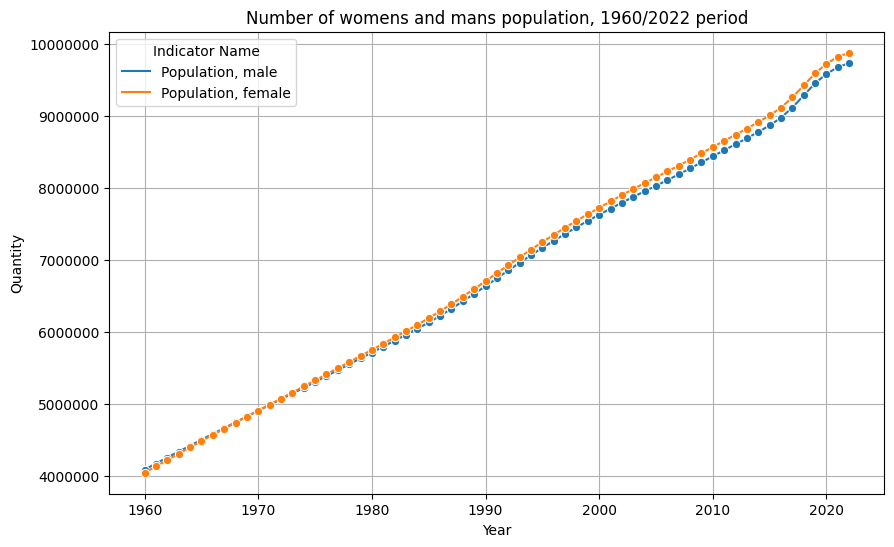

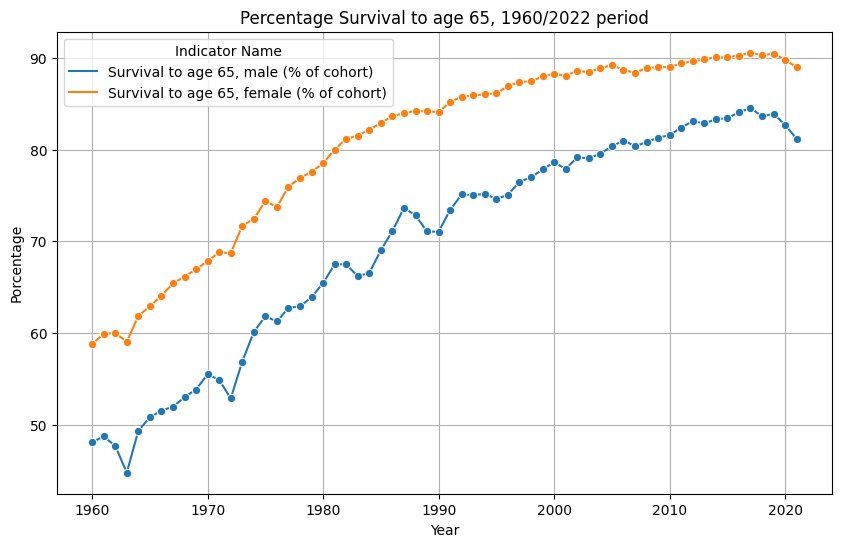

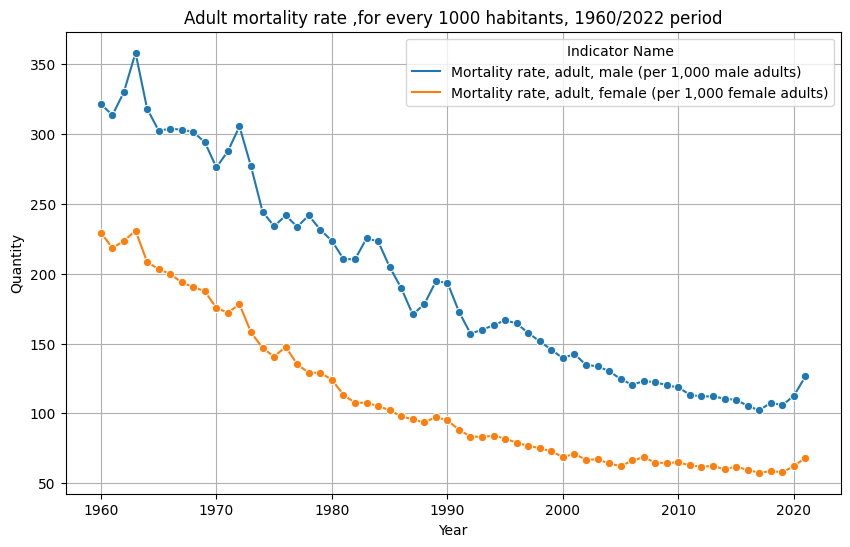

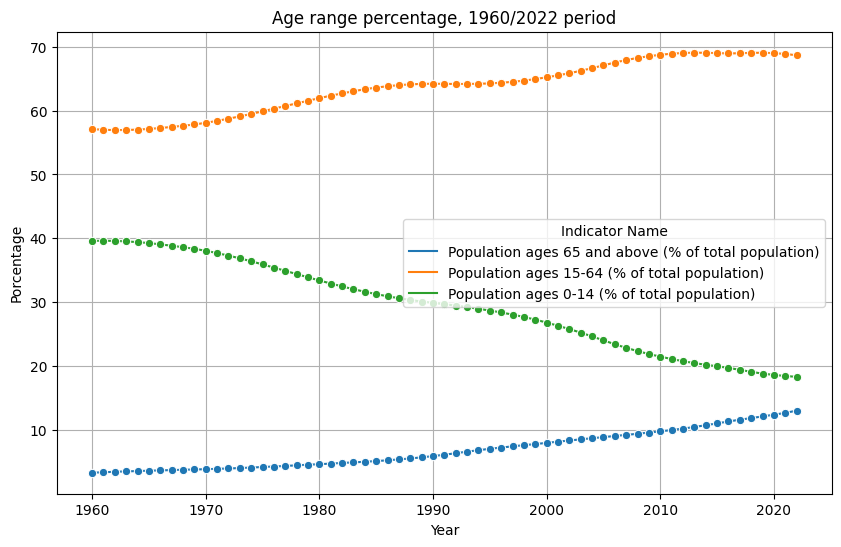

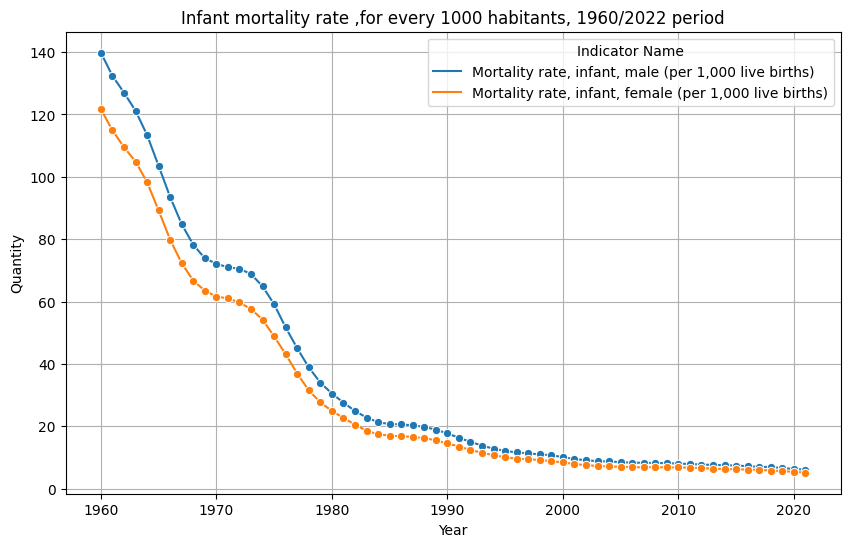

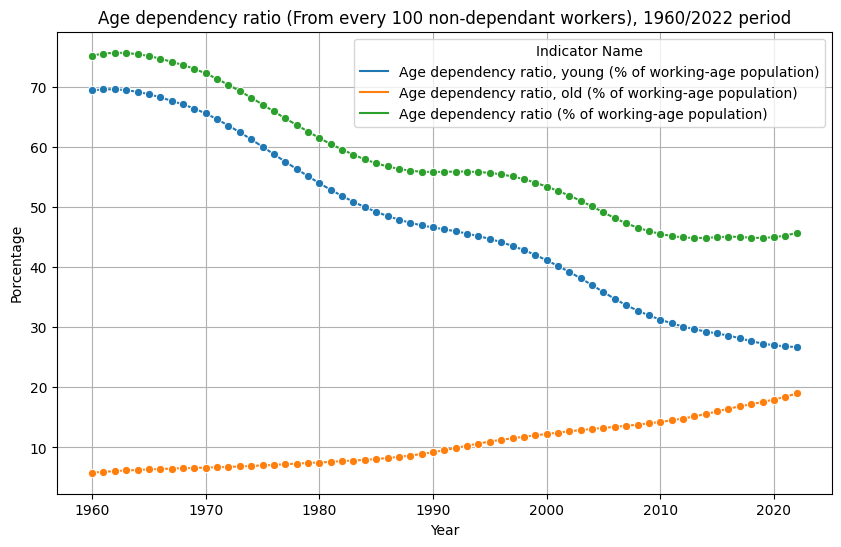

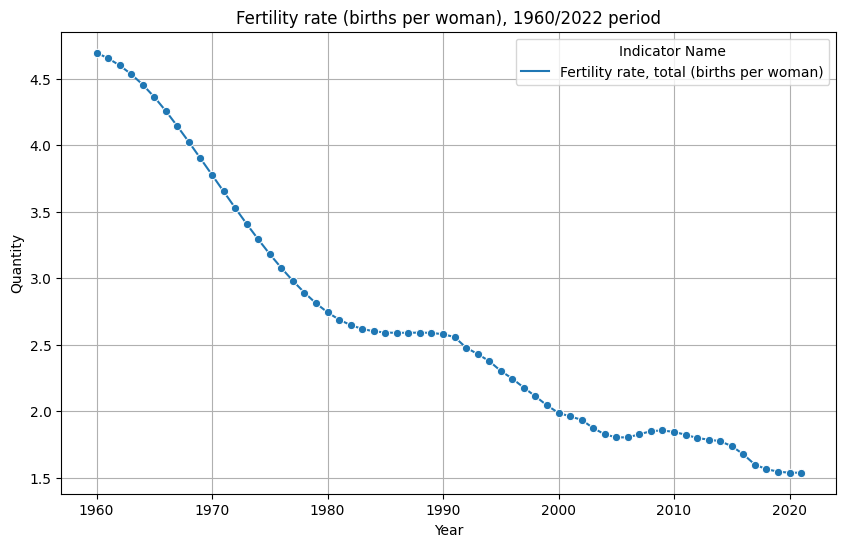

In [10]:
# Creación de graficos / Plotting

timegraph1 = timeplotting('Chile', lista_acciones_numericas_1, 'Number of womens and mans population', 'Numeric')
timegraph2 = timeplotting('Chile', lista_acciones_porcentuales_1, 'Percentage Survival to age 65', 'Porcentage')
timegraph3 = timeplotting('Chile', lista_acciones_numericas_2, 'Adult mortality rate ,for every 1000 habitants', 'Numeric')
timegraph4 = timeplotting('Chile', lista_acciones_porcentuales_2, 'Age range percentage', 'Porcentage')
timegraph5 = timeplotting('Chile', lista_acciones_numericas_3, 'Infant mortality rate ,for every 1000 habitants', 'Numeric')
timegraph6 = timeplotting('Chile', lista_acciones_porcentuales_3, 'Age dependency ratio (From every 100 non-dependant workers)', 'Porcentage')
timegraph7 = timeplotting('Chile', lista_acciones_numericas_4, 'Fertility rate (births per woman)', 'Numeric')

In [11]:
#clase para comparar métricas entre paises / class for comparing metrics between countries

class comparisonplotting():
    def __init__(self, indicator, countrylist, year, chartype, chartname):
        self.indicator = indicator
        self.df_indicatorfilter = df_original[df_original["Indicator Name"] == self.indicator]
        self.df_countryfilter = self.df_indicatorfilter[self.df_indicatorfilter["Country Name"].isin(countrylist)]
        self.df_countryfilter = self.df_countryfilter[['Country Name', 'Indicator Name', year]]

        plt.figure(figsize=(10, 6))
        plt.bar(self.df_countryfilter['Country Name'], self.df_countryfilter[year])


        plt.xlabel('Countries')
        if chartype == 'Numeric':
            plt.ylabel(f'Quantity in year {int(year)}')
        elif chartype == 'Porcentage':
            plt.ylabel(f'porcentage in year {int(year)}')
        else:
            raise ('Chart type not defined, please use "Numeric" or "Porcentage"')

        plt.title(f'{chartname}, year: {int(year)}')
        plt.grid(True, axis='y')
        plt.show()

In [12]:
# creación de listas a analizar / analysis list creation

countries_1 = ['Canada', 'Chile', 'Mexico']
year = 2022

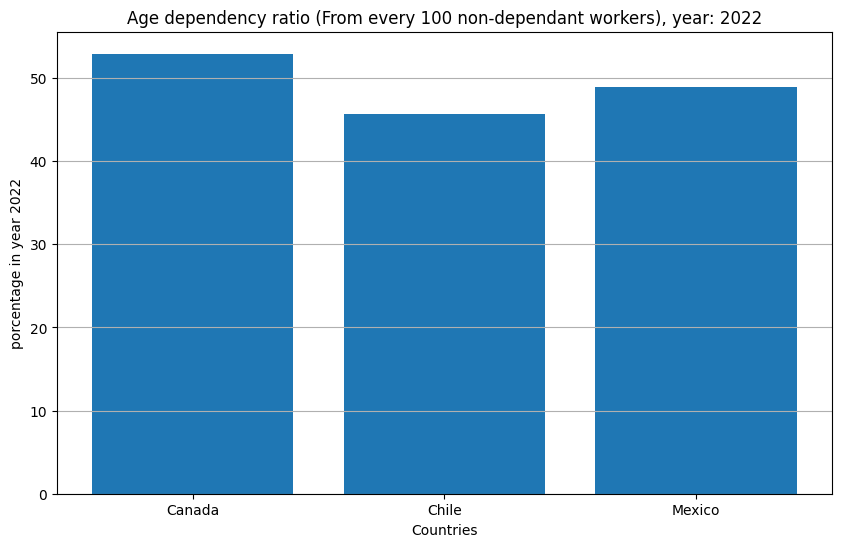

In [13]:
compgraph = comparisonplotting('Age dependency ratio (% of working-age population)', countries_1, float(year), "Porcentage", 'Age dependency ratio (From every 100 non-dependant workers)')
